In [1]:
import pandas as pd

dataset = pd.read_csv("student_pass_fail.csv")
dataset.head()

,study_hours,attendance,pass
0,1,60,0
1,2,65,0
2,3,70,0
3,4,75,1
4,5,80,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = dataset[["study_hours", "attendance"]]
y = dataset["pass"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

In [4]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [0, 1]])

The confusion matrix shows correct and incorrect predictions
across both classes (pass and fail).

It forms the basis for all classification metrics.


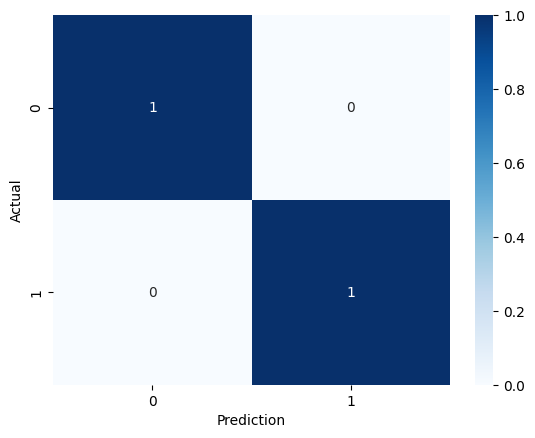

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt = "d", cmap="Blues")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Precision measures how many predicted positives are actually correct.

Recall measures how many actual positives were correctly identified.

F1-score balances precision and recall.


In [10]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  1.0


Although accuracy is high, it may not reflect model quality
when class distribution is imbalanced.

Precision and recall provide deeper insight.


In [11]:
y_prob = model.predict_proba(x_test_scaled)
y_prob

array([[0.66227655, 0.33772345],
       [0.13525005, 0.86474995]])

Logistic regression outputs probabilities.

The default decision threshold of 0.5 determines the final class prediction.


# Conclusion:
Classification metrics such as precision, recall, and F1-score

provide a more reliable evaluation than accuracy alone.

Proper metric selection depends on the problem context.
